# Bag of words clustering

This notebook contains the results and visualizations from clustering the bag of words matrix

Mount google drive containing the data

In [1]:
MOUNT_POINT = '/content/drive'

In [2]:
notebook_dir = '/content/drive/My\ Drive/notebooks'

Set *notebook_dir* to contain path to the directory containing log_parser.ipynb and clustering_utilities.ipynb

In [3]:
path = '/content/drive/My Drive/data-master'

Set *path* to contain path to the directory containing dataset

In [4]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Importing notebooks containing methods for parsing and processing log files

In [5]:
!pip install import_ipynb
import import_ipynb
%cd $notebook_dir
import clustering_utilities as cu
import log_parser

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=5226e55dd379d42817f5c5d40a2954466aebe5bad149e78cbff9d509a423db44
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
/content/drive/My Drive/notebooks
importing Jupyter notebook from clustering_utilities.ipynb
importing Jupyter notebook from log_parser.ipynb
Mounted at /content/drive


# Data preprocessing and clustering

First, we parse files and get a list of training objects 

In [6]:
training_list = log_parser.process_files(path)

We transform a list of Training objects to list of dictionaries suitable for clustering and load the bag of words values

In [7]:
prepared_list = cu.prepare_tlist_for_vectorizer(training_list, True)
matrix = cu.get_feature_matrix(prepared_list)

We set the minimal number of samples in a cluster to 4 and as similarity measure we chose Cosine similarity

In [8]:
MIN_SAMPLES = 5
SIMILARITY_MEASURE = 'cosine'

We apply clustering algorithm on feature matrix

In [9]:
clustering_results = cu.cluster(matrix, MIN_SAMPLES, SIMILARITY_MEASURE)

## Get cluster data

Training lists containing cluster data are used later for visualization

We create list of Training objects, for each cluster

In [10]:
cluster_names = ['cluster0', 'cluster1', 'cluster-1']
training_data = cu.extract_training_data(clustering_results, training_list, cluster_names)

Also, we need a list containing attribute values for each training in a cluster

In [11]:
attribute_names = ['bash_count', 'msf_count', 'average_diff',
                   'option_changes', 'requested_help']
attribute_data = []
for name in attribute_names:
  attribute_data.append(cu.get_attribute_values(training_data, name))

In [12]:
cluster_labels = ['Cluster1', 'Cluster2', 'Outliers']

# Results visualization

## OPTICS reachability plot

Point are ordered on the x-axis

Values on the y-axis represent reachabilty distance

The 'valleys' represent clusters, the deeper they are the more similar objects in the cluster are

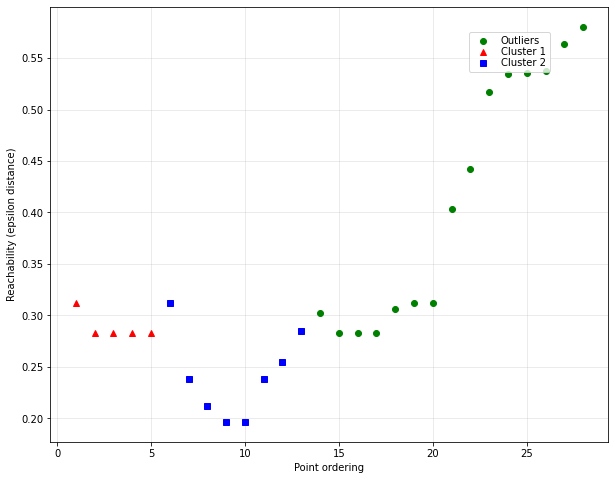

In [13]:
labels = ['Outliers', 'Cluster 1', 'Cluster 2']
cu.basic_cluster_visualization(clustering_results, len(prepared_list), labels)

## Scatterplot

Shows the relationship between number of typed bash and metasploit commands

In [14]:
xlabel = 'Bash commands'
ylabel = 'Metasploit commands'

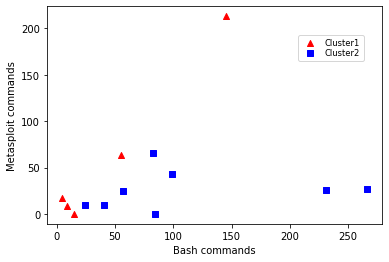

In [15]:
cu.scatter_plot(attribute_data, 0 ,1, xlabel, ylabel, cluster_labels[:-1])

## Bubble plot

Bubble plots show most frequent tool and command combinations for each cluster

We calculate the most frequent commands and options for each cluster and use these data to chart the bubble plots

In [16]:
res = cu.get_most_frequent_commands(training_data, 9, 5)

Bubble plot for Cluster 1

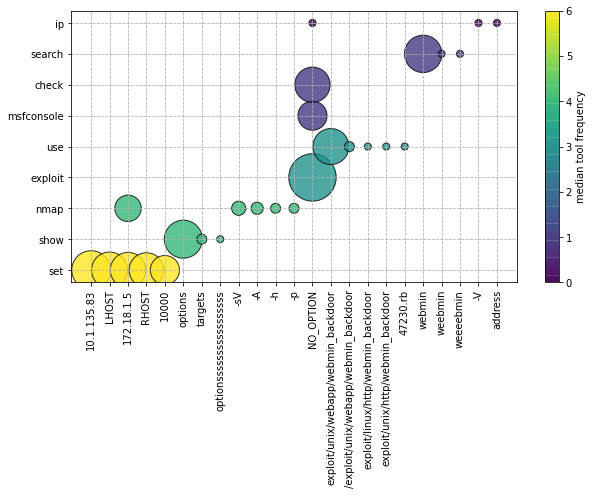

In [17]:
y, opacity = cu.prepare_bubble_plot_yaxis(res[:9])
x, size = cu.prepare_bubble_plot_xaxis(res[:9])
cu.bubbleplot(x, y, opacity,size)

Bubble plot for Cluster 2

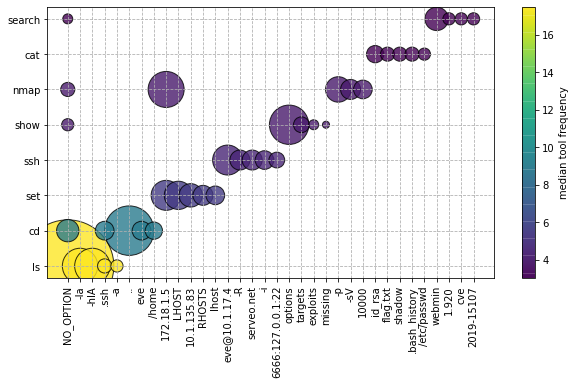

In [18]:
y, opacity = cu.prepare_bubble_plot_yaxis(res[9:17])
x, size = cu.prepare_bubble_plot_xaxis(res[9:17])
cu.bubbleplot(x, y, opacity,size)